In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
df = pd.read_csv("AviationDataCopy.csv", low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight,Report.Status,Publication.Date,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,20001218X45444,Accident,SEA87LA080,1948,10,24,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20001218X45447,Accident,LAX94LA336,1962,7,19,NaN,NaN,NaN,NaN,...,Unknown,Probable Cause,19-09-1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20061025X01555,Accident,NYC07LA005,1974,8,30,36.922223,-81.878056,NaN,NaN,...,Cruise,Probable Cause,26-02-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20001218X45448,Accident,LAX96LA321,1977,6,19,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,12-09-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20041105X01764,Accident,CHI79FA064,1979,8,2,NaN,NaN,NaN,NaN,...,Approach,Probable Cause,16-04-1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

In [9]:
df = df.drop(["Event.Id", "Investigation.Type", "Accident.Number", "Airport.Code", "Registration.Number", "Report.Status", 'Publication.Date', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'], axis = 1)
df.head()

,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948,10,24,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,Stinson,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962,7,19,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,Piper,...,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974,8,30,36.922223,-81.878056,NaN,Fatal(3),Destroyed,NaN,Cessna,...,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977,6,19,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,Rockwell,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979,8,2,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,Cessna,...,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach


In [10]:
df.isnull().sum()

Event.Date                    0
Location                      0
Country                       0
Latitude                  54207
Longitude                 54216
Airport.Name              35326
Injury.Severity             883
Aircraft.damage            3009
Aircraft.Category         56497
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          5747
Engine.Type                5891
FAR.Description           56820
Schedule                  74948
Purpose.of.flight          5791
Air.carrier               71308
Total.Fatal.Injuries      11404
Total.Serious.Injuries    12510
Total.Minor.Injuries      11934
Total.Uninjured            5914
Weather.Condition          3978
Broad.phase.of.flight     25555
dtype: int64

In [11]:
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(0)
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].astype(object).astype(int)
  
print(df.dtypes)

Event.Date                  int64
Location                    int64
Country                     int64
Latitude                   object
Longitude                  object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines          object
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries        int32
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
dtype: object


In [12]:
## dealing with null values
df = df.drop(["Latitude", "Longitude", "Airport.Name", "Aircraft.Category", "FAR.Description", 
              "Schedule", "Air.carrier"], axis = 1)
df.isnull().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity             883
Aircraft.damage            3009
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          5747
Engine.Type                5891
Purpose.of.flight          5791
Total.Fatal.Injuries          0
Total.Serious.Injuries    12510
Total.Minor.Injuries      11934
Total.Uninjured            5914
Weather.Condition          3978
Broad.phase.of.flight     25555
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87278 entries, 0 to 87277
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              87278 non-null  int64  
 1   Location                87278 non-null  int64  
 2   Country                 87278 non-null  int64  
 3   Injury.Severity         86395 non-null  object 
 4   Aircraft.damage         84269 non-null  object 
 5   Make                    87215 non-null  object 
 6   Model                   87186 non-null  object 
 7   Amateur.Built           87176 non-null  object 
 8   Number.of.Engines       81531 non-null  object 
 9   Engine.Type             81387 non-null  object 
 10  Purpose.of.flight       81487 non-null  object 
 11  Total.Fatal.Injuries    87278 non-null  int32  
 12  Total.Serious.Injuries  74768 non-null  float64
 13  Total.Minor.Injuries    75344 non-null  float64
 14  Total.Uninjured         81364 non-null

In [14]:
df["Injury.Severity"] = df["Injury.Severity"].fillna("Unknown")
df["Aircraft.damage"] = df["Aircraft.damage"].fillna("Unknown")
df["Make"] = df["Make"].fillna("Unknown")
df["Model"] = df["Model"].fillna("Unknown")
df["Amateur.Built"] = df["Amateur.Built"].fillna("Unknown")
df["Number.of.Engines"] = df["Number.of.Engines"].fillna("Unknown")
df["Engine.Type"] = df["Engine.Type"].fillna("Unknown")
df["Purpose.of.flight"] = df["Purpose.of.flight"].fillna("Unknown")
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(0)
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(0)
df["Total.Uninjured"] = df["Total.Uninjured"].fillna(0)
df["Weather.Condition"] = df["Weather.Condition"].fillna("Unknown")
df["Broad.phase.of.flight"] = df["Broad.phase.of.flight"].fillna("Unknown")

In [15]:
df.isnull().sum()

Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [16]:
df = df.loc[df['Injury.Severity'] != "Non-Fatal"]
df = df.loc[df['Injury.Severity'] != "Incident"]
df.head(10)

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948,10,24,Fatal(2),Destroyed,Stinson,108-3,No,1,Reciprocating,Personal,2,0.0,0.0,0.0,UNK,Cruise
1,1962,7,19,Fatal(4),Destroyed,Piper,PA24-180,No,1,Reciprocating,Personal,4,0.0,0.0,0.0,UNK,Unknown
2,1974,8,30,Fatal(3),Destroyed,Cessna,172M,No,1,Reciprocating,Personal,3,0.0,0.0,0.0,IMC,Cruise
3,1977,6,19,Fatal(2),Destroyed,Rockwell,112,No,1,Reciprocating,Personal,2,0.0,0.0,0.0,IMC,Cruise
4,1979,8,2,Fatal(1),Destroyed,Cessna,501,No,Unknown,Unknown,Personal,1,2.0,0.0,0.0,VMC,Approach
6,1981,8,1,Fatal(4),Destroyed,Cessna,180,No,1,Reciprocating,Personal,4,0.0,0.0,0.0,IMC,Unknown
13,1982,1,2,Fatal(1),Destroyed,Cessna,R172K,No,1,Reciprocating,Personal,1,0.0,0.0,0.0,IMC,Takeoff
14,1982,1,2,Fatal(1),Destroyed,Navion,A,No,1,Reciprocating,Personal,1,0.0,0.0,0.0,IMC,Cruise
15,1982,1,2,Fatal(2),Destroyed,Beech,19,No,1,Reciprocating,Personal,2,0.0,0.0,0.0,IMC,Cruise
17,1982,1,2,Fatal(3),Destroyed,Cessna,180,No,1,Reciprocating,Personal,3,0.0,0.0,0.0,VMC,Unknown


In [17]:
len(df)

18502

## Visualizations

In [18]:
df.groupby(['Event.Date', 'Broad.phase.of.flight'])
df.head()
# print(df.groupby(['Event.Date', 'Broad.phase.of.flight']).groups)

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948,10,24,Fatal(2),Destroyed,Stinson,108-3,No,1,Reciprocating,Personal,2,0.0,0.0,0.0,UNK,Cruise
1,1962,7,19,Fatal(4),Destroyed,Piper,PA24-180,No,1,Reciprocating,Personal,4,0.0,0.0,0.0,UNK,Unknown
2,1974,8,30,Fatal(3),Destroyed,Cessna,172M,No,1,Reciprocating,Personal,3,0.0,0.0,0.0,IMC,Cruise
3,1977,6,19,Fatal(2),Destroyed,Rockwell,112,No,1,Reciprocating,Personal,2,0.0,0.0,0.0,IMC,Cruise
4,1979,8,2,Fatal(1),Destroyed,Cessna,501,No,Unknown,Unknown,Personal,1,2.0,0.0,0.0,VMC,Approach


<AxesSubplot: >

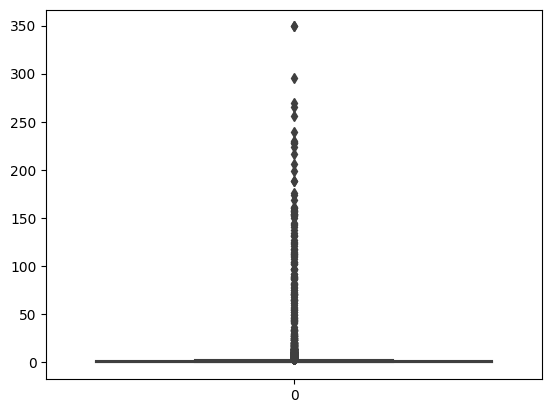

In [19]:
sns.boxplot(df["Total.Fatal.Injuries"])

In [20]:
df.shape

(18502, 17)

# Removing Outliers

In [21]:
percentile25 = df["Total.Fatal.Injuries"].quantile(0.25)
percentile75 = df["Total.Fatal.Injuries"].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


#df[df["Total.Fatal.Injuries"] < lower_limit]

#Trimming
#df2 = df[df["Total.Fatal.Injuries"] < upper_limit]
#df2.shape

In [22]:
len(df[df["Total.Fatal.Injuries"] > upper_limit])

2143

In [23]:
df = df[df["Total.Fatal.Injuries"] < upper_limit]
df.shape

(16359, 17)

In [24]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import category_encoders as ce

from sklearn.ensemble import GradientBoostingRegressor

In [25]:
# Train test split
target = 'Total.Fatal.Injuries'
y = df[target]
X = df.drop(columns=[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)

In [26]:
# Encode Categorical variable
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)

In [27]:
X_train_loo

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
26968,1990,11,10,1.000000,1.583110,1.500000,1.443799,1.266616,1.491039,1.517796,1.519786,0.0,0.0,0.0,1.465490,1.561828
50072,2001,2,8,3.000000,1.582878,1.923077,2.100000,1.575901,1.095719,1.102941,1.120325,0.0,0.0,0.0,1.465265,1.305214
29465,1991,11,16,2.000000,1.582994,1.591456,1.333333,1.576033,1.553088,1.517693,1.695484,0.0,0.0,0.0,1.465378,1.463810
34422,1994,1,23,2.000000,1.344196,1.000000,1.443799,1.576033,1.490932,1.517693,1.519652,0.0,0.0,0.0,1.465378,1.463810
25098,1990,3,19,1.000000,1.583110,1.591845,1.764706,1.576164,1.491039,1.517796,1.681633,0.0,0.0,0.0,1.672853,1.561828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8440,1984,5,31,1.000000,1.583110,1.591845,1.463054,1.576164,1.491039,1.517796,1.519786,0.0,0.0,0.0,1.465490,1.305617
78187,2016,5,5,0.000000,0.385214,0.027027,0.000000,1.254788,1.097503,1.104412,1.121545,0.0,0.0,0.0,0.943919,1.305818
31423,1992,9,13,1.000000,1.344465,1.591845,1.303030,1.576164,1.491039,1.517796,1.519786,1.0,0.0,0.0,1.465490,1.523556
82919,2019,3,10,1.504478,1.344196,1.529412,1.333333,1.254233,1.096314,1.103431,1.120732,0.0,0.0,0.0,0.942568,1.305416


In [28]:
import xgboost as xgb

In [29]:
xgb_ = xgb.XGBRegressor(n_estimators= 100, eval_metric='rmse', tree_method='auto')
xgb_.fit(X_train_loo, y_train)

rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_.predict(X_test_loo)))
rmse_xgb

0.44155735264948537

In [30]:
feature_importance = xgb_.feature_importances_
importance_df = pd.DataFrame({'features': X_train_loo.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
15,Broad.phase.of.flight,6.134890e-01
3,Injury.Severity,2.596319e-01
7,Amateur.Built,9.199268e-02
0,Event.Date,3.418807e-02
8,Number.of.Engines,6.982484e-04
9,Engine.Type,5.394192e-08
1,Location,0.000000e+00
2,Country,0.000000e+00
4,Aircraft.damage,0.000000e+00
5,Make,0.000000e+00


In [31]:
# feature selection
selector = SelectFromModel(xgb_, prefit=True, threshold='0.01*mean')
X_train_loo_new = selector.transform(X_train_loo)
X_test_loo_new = selector.transform(X_test_loo)
print(X_train_loo.shape, X_train_loo_new.shape)

(13087, 16) (13087, 5)


C:\Users\nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [32]:
feature_list = importance_df[importance_df.importance > 0.005]['features'].tolist()
feature_list

['Broad.phase.of.flight', 'Injury.Severity', 'Amateur.Built', 'Event.Date']

In [33]:
X_train_loo_new = X_train_loo[feature_list]
X_test_loo_new = X_test_loo[feature_list]

In [34]:
xgb_model = xgb.XGBRegressor(n_estimators= 200, tree_method='auto')
xgb_model.fit(X_train_loo_new, y_train)

rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test_loo_new)))
rmse_xgb


0.4415718672654891

In [35]:
Y_train_pred = xgb_model.predict(X_train_loo_new)
Y_test_pred = xgb_model.predict(X_test_loo_new)

In [59]:
df_pred_xgb = pd.DataFrame(y_test.values, columns=['Actual'])
df_pred_xgb['Predicted'] = (Y_test_pred)
# df_pred = df_pred.reset_index()
# df_pred.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df_pred_xgb

,Actual,Predicted
0,0,0.000024
1,2,1.999995
2,1,1.000008
3,1,1.000003
4,2,1.999995
...,...,...
3267,2,1.999995
3268,1,1.000003
3269,0,0.000024
3270,1,1.000003


In [60]:
df_pred_xgb.to_csv('xgb_without0.csv', index=False)

In [61]:
from sklearn.metrics import r2_score

score = r2_score(df_pred_xgb['Actual'], df_pred_xgb['Predicted'])
print("The accuracy of our model is {}%".format((score) *100))

The accuracy of our model is 66.83251199442952%


In [62]:
import seaborn as sns

(3272,)


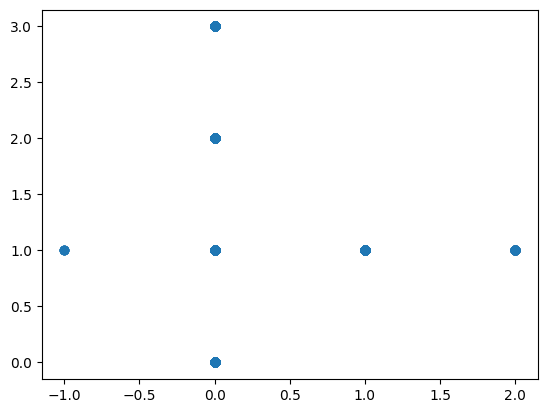

In [63]:
residuals = df_pred_xgb['Actual'] - df_pred_xgb['Predicted']
print(residuals.shape)
plt.scatter(residuals, df_pred_xgb['Predicted'])

In [64]:
def r2_buffer(df_pred_xgb):
    mean = df_pred_xgb['Actual'].mean()
    e1_list = []
    e2_list = []
    
    for i in df_pred_xgb.index:
        error = df_pred_xgb['Predicted'][i] - df_pred_xgb['Actual'][i]
        if (-1 <= error and error <= 1 ):
            error = 0
        e1_2 = error**2
        e2 = df_pred_xgb['Actual'][i] - mean
        e2_2 = e2**2
        e1_list.append(e1_2)
        e2_list.append(e2_2)
        
    sum_e1 = sum(e1_list)
    sum_e2 = sum(e2_list)
    
    r2 = 1 - (sum_e1 / sum_e2)
    print(r2)
        
        
        
r2_buffer(df_pred_xgb)
    

0.8055692546738018
